In [1]:
import json
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.path import Path

## 提取城市边界数据
广东省.json文件中，有各个市的轮廓多边形数据，其实就是很多个坐标点连成线，构成一个市的轮廓  
根据这个多边形，我们输入一个任务点坐标，就可以知道这个点在哪个城市里面

In [2]:
# 打开并读取JSON文件
with open('../data/广东省.json', 'r', encoding='utf-8') as file:
    data = json.load(file)
data

{'type': 'FeatureCollection',
 'features': [{'type': 'Feature',
   'properties': {'adcode': 440100,
    'name': '广州市',
    'center': [113.280637, 23.125178],
    'centroid': [113.544372, 23.329249],
    'childrenNum': 11,
    'level': 'city',
    'parent': {'adcode': 440000},
    'subFeatureIndex': 0,
    'acroutes': [100000, 440000]},
   'geometry': {'type': 'MultiPolygon',
    'coordinates': [[[[113.365116, 22.772595],
       [113.412172, 22.742849],
       [113.42612, 22.738014],
       [113.447808, 22.735836],
       [113.467964, 22.728504],
       [113.464822, 22.72096],
       [113.491875, 22.699811],
       [113.523373, 22.679297],
       [113.540693, 22.666222],
       [113.533106, 22.656388],
       [113.536861, 22.647511],
       [113.561615, 22.607528],
       [113.578552, 22.604603],
       [113.589971, 22.59519],
       [113.599628, 22.594393],
       [113.62078, 22.579554],
       [113.639326, 22.548276],
       [113.651588, 22.515715],
       [113.692052, 22.515129],
   

In [3]:
data['features']

[{'type': 'Feature',
  'properties': {'adcode': 440100,
   'name': '广州市',
   'center': [113.280637, 23.125178],
   'centroid': [113.544372, 23.329249],
   'childrenNum': 11,
   'level': 'city',
   'parent': {'adcode': 440000},
   'subFeatureIndex': 0,
   'acroutes': [100000, 440000]},
  'geometry': {'type': 'MultiPolygon',
   'coordinates': [[[[113.365116, 22.772595],
      [113.412172, 22.742849],
      [113.42612, 22.738014],
      [113.447808, 22.735836],
      [113.467964, 22.728504],
      [113.464822, 22.72096],
      [113.491875, 22.699811],
      [113.523373, 22.679297],
      [113.540693, 22.666222],
      [113.533106, 22.656388],
      [113.536861, 22.647511],
      [113.561615, 22.607528],
      [113.578552, 22.604603],
      [113.589971, 22.59519],
      [113.599628, 22.594393],
      [113.62078, 22.579554],
      [113.639326, 22.548276],
      [113.651588, 22.515715],
      [113.692052, 22.515129],
      [113.728149, 22.521993],
      [113.740487, 22.534284],
      [113.71

迭代查找 'name' 为 '广州、深圳、佛山、东莞' 的 feature

In [4]:
with open('../data/广东省.json', 'r', encoding='utf-8') as file:
    data = json.load(file)

guangzhou = []
shenzhen = []
foshan = []
dongguang = []

for feature in data['features']:
    if feature['properties']['name'] == '广州市':
        print(f"名称: {feature['properties']['name']}")
        guangzhou = feature['geometry']['coordinates'][0][0]
    if feature['properties']['name'] == '深圳市':
        print(f"名称: {feature['properties']['name']}")
        shenzhen = feature['geometry']['coordinates'][0][0]
    if feature['properties']['name'] == '佛山市':
        print(f"名称: {feature['properties']['name']}")
        foshan = feature['geometry']['coordinates'][0][0]
    if feature['properties']['name'] == '东莞市':
        print(f"名称: {feature['properties']['name']}")
        dongguang = feature['geometry']['coordinates'][0][0]

名称: 广州市
名称: 深圳市
名称: 佛山市
名称: 东莞市


In [5]:
# 读取Excel文件
df = pd.read_excel('../data/Q1.xlsx')  # 替换为你的Excel文件路径
df

,任务号码,任务gps纬度,任务gps经度,任务标价,任务执行情况
0,A0001,22.566142,113.980837,66.0,0
1,A0002,22.686205,113.940525,65.5,0
2,A0003,22.576512,113.957198,65.5,1
3,A0004,22.564841,114.244571,75.0,0
4,A0005,22.558888,113.950723,65.5,0
...,...,...,...,...,...
830,A0831,23.044062,113.125784,65.5,0
831,A0832,22.833262,113.280152,72.0,1
832,A0833,22.814676,113.827731,85.0,1
833,A0834,23.063674,113.771188,65.5,1


In [6]:
df['任务标价'].mean()

69.11077844311377

In [7]:
df['任务标价'].sum()

57707.5

In [8]:
# 从Excel中提取所有点的经纬度数据
lat_points = df['任务gps纬度'].tolist()
lon_points = df['任务gps经度'].tolist()

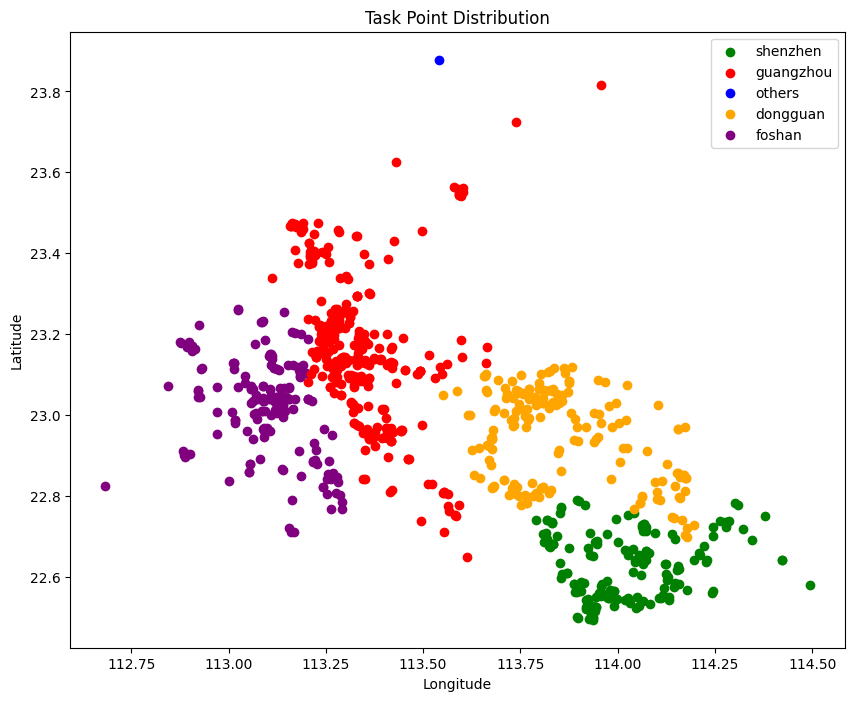

In [9]:
# 转换为 Path 对象
guangzhou_path = Path(guangzhou)
shenzhen_path = Path(shenzhen)
foshan_path = Path(foshan)
dongguan_path = Path(dongguang)

# 判断哪些点在各城市多边形内
points = list(zip(lon_points, lat_points))
is_inside_gz = guangzhou_path.contains_points(points)
is_inside_sz = shenzhen_path.contains_points(points)
is_inside_fs = foshan_path.contains_points(points)
is_inside_dg = dongguan_path.contains_points(points)

# 初始化标志变量，确保每个标签只出现一次
plotted_labels = {
    "guangzhou": False,
    "shenzhen": False,
    "foshan": False,
    "dongguan": False,
    "others": False
}

index1 = []
index2 = []
index3 = []
index4 = []


# 绘制所有点
plt.figure(figsize=(10, 8))
for i in range(len(lat_points)):
    if is_inside_gz[i]:
        label = 'guangzhou' if not plotted_labels['guangzhou'] else ""
        plotted_labels['guangzhou'] = True
        plt.scatter(lon_points[i], lat_points[i], color='red', label=label)
        index1.append(i)
    elif is_inside_sz[i]:
        label = 'shenzhen' if not plotted_labels['shenzhen'] else ""
        plotted_labels['shenzhen'] = True
        plt.scatter(lon_points[i], lat_points[i], color='green', label=label)
        index2.append(i)
    elif is_inside_fs[i]:
        label = 'foshan' if not plotted_labels['foshan'] else ""
        plotted_labels['foshan'] = True
        plt.scatter(lon_points[i], lat_points[i], color='purple', label=label)
        index3.append(i)
    elif is_inside_dg[i]:
        label = 'dongguan' if not plotted_labels['dongguan'] else ""
        plotted_labels['dongguan'] = True
        plt.scatter(lon_points[i], lat_points[i], color='orange', label=label)
        index4.append(i)
    else:
        label = 'others' if not plotted_labels['others'] else ""
        plotted_labels['others'] = True
        plt.scatter(lon_points[i], lat_points[i], color='blue', label=label)

# 添加图例
plt.legend(loc='best')
# 设置标题和轴标签
plt.title('Task Point Distribution')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

# 显示图像
# plt.show()
# 保存图像为PNG格式
plt.savefig('city_dis.png', dpi=300, bbox_inches='tight')

由上述分界可知：各个任务点分别隶属于不同的市区中，再根据索引数据划分出4个子dataframe

In [10]:
guangzhou_rows = df.iloc[index1]
guangzhou_rows

,任务号码,任务gps纬度,任务gps经度,任务标价,任务执行情况
125,A0126,23.167690,113.665173,75.0,1
126,A0127,23.165498,113.387590,65.5,1
127,A0128,23.159336,113.338711,65.5,0
128,A0129,23.168789,113.419960,66.5,1
129,A0130,23.128493,113.350619,65.0,0
...,...,...,...,...,...
478,A0479,22.942957,113.393422,66.0,1
479,A0480,23.094501,113.266407,66.5,1
480,A0481,23.196770,113.270313,80.0,1
578,A0579,23.335556,113.307529,67.5,1


In [11]:
shenzhen_rows = df.iloc[index2]
shenzhen_rows

,任务号码,任务gps纬度,任务gps经度,任务标价,任务执行情况
0,A0001,22.566142,113.980837,66.0,0
1,A0002,22.686205,113.940525,65.5,0
2,A0003,22.576512,113.957198,65.5,1
3,A0004,22.564841,114.244571,75.0,0
4,A0005,22.558888,113.950723,65.5,0
...,...,...,...,...,...
464,A0465,22.546603,114.104955,67.0,0
465,A0466,22.575176,114.144939,67.0,0
466,A0467,22.568478,113.900111,65.5,0
467,A0468,22.538264,114.065868,80.0,0


In [12]:
foshan_rows = df.iloc[index3]
foshan_rows

,任务号码,任务gps纬度,任务gps经度,任务标价,任务执行情况
481,A0482,23.005696,113.124366,65.5,0
483,A0484,23.032726,113.120130,65.5,0
484,A0485,23.006211,113.124131,65.5,0
489,A0490,23.031223,113.120797,65.5,0
513,A0514,22.959983,113.047410,72.5,1
...,...,...,...,...,...
828,A0829,23.179030,112.876192,80.0,1
829,A0830,23.123411,113.151775,85.0,1
830,A0831,23.044062,113.125784,65.5,0
831,A0832,22.833262,113.280152,72.0,1


In [13]:
dongguang_rows = df.iloc[index4]
dongguang_rows

,任务号码,任务gps纬度,任务gps经度,任务标价,任务执行情况
372,A0373,23.097051,113.658152,68.0,1
482,A0483,23.044908,113.788434,65.5,1
485,A0486,22.777591,113.751681,70.0,1
486,A0487,22.721038,114.179052,70.5,1
487,A0488,22.812305,114.172988,72.0,1
...,...,...,...,...,...
806,A0807,23.039098,113.773178,65.5,1
807,A0808,22.846704,114.159286,85.0,1
827,A0828,23.012808,113.760312,66.0,1
832,A0833,22.814676,113.827731,85.0,1


四市详情

In [14]:
guangzhou_rows['任务标价'].sum()

21713.5

In [15]:
done_num = guangzhou_rows[guangzhou_rows['任务执行情况'] == 1].shape[0]
done_percent = done_num / guangzhou_rows.shape[0]
done_percent

0.6081504702194357

In [16]:
shenzhen_rows['任务标价'].mean()

67.31288343558282

In [17]:
done_num = shenzhen_rows[shenzhen_rows['任务执行情况'] == 1].shape[0]
done_percent = done_num / shenzhen_rows.shape[0]
done_percent

0.2085889570552147

In [18]:
foshan_rows['任务标价'].mean()

71.44252873563218

In [19]:
done_num = foshan_rows[foshan_rows['任务执行情况'] == 1].shape[0]
done_percent = done_num / foshan_rows.shape[0]
done_percent

0.6609195402298851

In [20]:
dongguang_rows['任务标价'].mean()

70.34269662921348

In [21]:
done_num = dongguang_rows[dongguang_rows['任务执行情况'] == 1].shape[0]
done_percent = done_num / dongguang_rows.shape[0]
done_percent

1.0

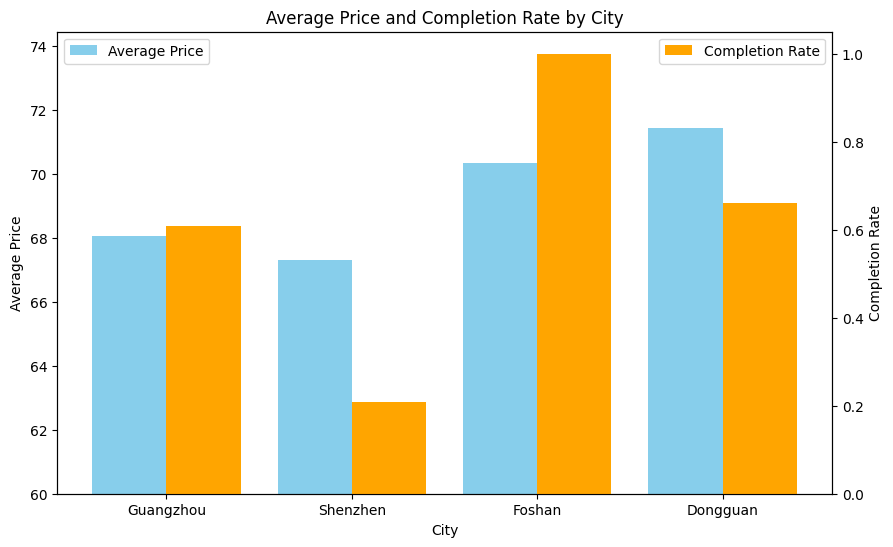

In [22]:
import matplotlib.pyplot as plt
import numpy as np

# 城市名称
cities = ['Guangzhou', 'Shenzhen', 'Foshan', 'Dongguan']

# 各城市的平均定价
average_prices = [68.067, 67.312, 70.343, 71.443]  # 替换为你的实际数据

# 各城市的订单完成率
completion_rates = [0.608, 0.209, 1.0, 0.661]  # 替换为你的实际数据

# 创建图形和子图
fig, ax1 = plt.subplots(figsize=(10, 6))

# 设置位置
x = np.arange(len(cities))
width = 0.4

# 绘制平均定价的柱状图
ax1.bar(x - width/2, average_prices, width, label='Average Price', color='skyblue')

# 设置平均定价的 y 轴范围，从 50 开始
ax1.set_ylim(60, max(average_prices) + 3)

# 创建第二个 y 轴来显示订单完成率
ax2 = ax1.twinx()
ax2.bar(x + width/2, completion_rates, width, label='Completion Rate', color='orange')

# 设置标题和轴标签
ax1.set_xlabel('City')
ax1.set_ylabel('Average Price')
ax2.set_ylabel('Completion Rate')
ax1.set_title('Average Price and Completion Rate by City')

# 设置 x 轴的刻度
ax1.set_xticks(x)
ax1.set_xticklabels(cities)

# 添加图例
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# 显示图形
# plt.show()
# 保存图像为PNG格式
plt.savefig('data4city.png', dpi=300, bbox_inches='tight')

GDP情况

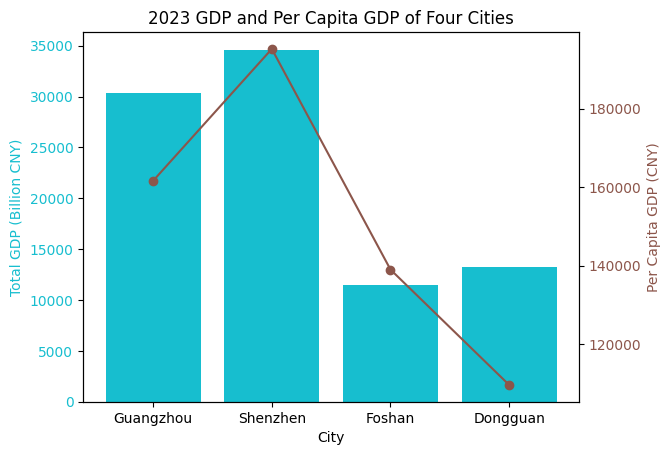

In [23]:
import matplotlib.pyplot as plt

# 数据
cities = ["Guangzhou", "Shenzhen", "Foshan", "Dongguan"]
total_gdp = [30355.73, 34606.40, 11438.13, 13276.14]  # 单位: 亿元
per_capita_gdp = [161634, 195230, 139000, 109600]  # 单位: 元

# 创建图形
fig, ax1 = plt.subplots()

# 绘制总GDP的柱状图
color = 'tab:cyan'
ax1.set_xlabel('City')
ax1.set_ylabel('Total GDP (Billion CNY)', color=color)
ax1.bar(cities, total_gdp, color=color)
ax1.tick_params(axis='y', labelcolor=color)

# 创建第二个Y轴，共享X轴
ax2 = ax1.twinx()
color = 'tab:brown'
ax2.set_ylabel('Per Capita GDP (CNY)', color=color)
ax2.plot(cities, per_capita_gdp, color=color, marker='o')
ax2.tick_params(axis='y', labelcolor=color)

# 标题和展示
plt.title('2023 GDP and Per Capita GDP of Four Cities')
# plt.show()
# 保存图像为PNG格式
plt.savefig('GDP.png', dpi=300, bbox_inches='tight')

In [24]:
import pandas as pd
import math

# Haversine公式计算距离（单位：公里）
def haversine(lat1, lon1, lat2, lon2):
    R = 6371  # 地球半径，单位公里
    phi1 = math.radians(lat1)
    phi2 = math.radians(lat2)
    delta_phi = math.radians(lat2 - lat1)
    delta_lambda = math.radians(lon2 - lon1)
    
    a = math.sin(delta_phi / 2) ** 2 + \
        math.cos(phi1) * math.cos(phi2) * \
        math.sin(delta_lambda / 2) ** 2
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))
    
    return R * c

# 读取数据
tasks = pd.read_excel('../data/Q1.xlsx')
customers = pd.read_excel('../data/Q2.xlsx')

# 统计每个任务点3km内的顾客数量
result = []

for index, task in tasks.iterrows():
    task_lat, task_lon = task['任务gps纬度'], task['任务gps经度']
    count = 0
    for _, customer in customers.iterrows():
        customer_lat, customer_lon = map(float, customer['会员位置(GPS)'].split())
        distance = haversine(task_lat, task_lon, customer_lat, customer_lon)
        if distance <= 1:
            count += 1
    result.append({'任务号码': task['任务号码'], '1km内顾客数量': count})

# 转换为DataFrame并显示
result_df = pd.DataFrame(result)
print(result_df)
result_df

      任务号码  1km内顾客数量
0    A0001         0
1    A0002        12
2    A0003         4
3    A0004         0
4    A0005         2
..     ...       ...
830  A0831         5
831  A0832         1
832  A0833         0
833  A0834         4
834  A0835         1

[835 rows x 2 columns]


,任务号码,1km内顾客数量
0,A0001,0
1,A0002,12
2,A0003,4
3,A0004,0
4,A0005,2
...,...,...
830,A0831,5
831,A0832,1
832,A0833,0
833,A0834,4


In [25]:
# 先确保两个数据框的索引匹配，或者通过任务编号进行合并
# 例如通过任务编号进行合并：
merged_df = pd.concat([tasks.set_index('任务号码'), result_df.set_index('任务号码')], axis=1)

# 或者如果两个数据框的索引已经是对应的：
# merged_df = pd.concat([tasks, result_df['1km内顾客数量']], axis=1)

# 查看合并后的数据框
merged_df

,任务gps纬度,任务gps经度,任务标价,任务执行情况,1km内顾客数量
任务号码,,,,,
A0001,22.566142,113.980837,66.0,0,0
A0002,22.686205,113.940525,65.5,0,12
A0003,22.576512,113.957198,65.5,1,4
A0004,22.564841,114.244571,75.0,0,0
A0005,22.558888,113.950723,65.5,0,2
...,...,...,...,...,...
A0831,23.044062,113.125784,65.5,0,5
A0832,22.833262,113.280152,72.0,1,1
A0833,22.814676,113.827731,85.0,1,0


广州具体分析

In [26]:
guangzhou_rows = merged_df.iloc[index1]
guangzhou_rows

,任务gps纬度,任务gps经度,任务标价,任务执行情况,1km内顾客数量
任务号码,,,,,
A0126,23.167690,113.665173,75.0,1,1
A0127,23.165498,113.387590,65.5,1,8
A0128,23.159336,113.338711,65.5,0,1
A0129,23.168789,113.419960,66.5,1,0
A0130,23.128493,113.350619,65.0,0,2
...,...,...,...,...,...
A0479,22.942957,113.393422,66.0,1,1
A0480,23.094501,113.266407,66.5,1,6
A0481,23.196770,113.270313,80.0,1,7


In [27]:
mean_value = guangzhou_rows[guangzhou_rows['任务执行情况'] == 1]['1km内顾客数量'].mean()
print(mean_value)

2.5463917525773194


In [28]:
mean_value = guangzhou_rows[guangzhou_rows['任务执行情况'] == 0]['1km内顾客数量'].mean()
print(mean_value)

3.664


In [29]:
guangzhou_rows['任务标价']

任务号码
A0126    75.0
A0127    65.5
A0128    65.5
A0129    66.5
A0130    65.0
         ... 
A0479    66.0
A0480    66.5
A0481    80.0
A0579    67.5
A0678    67.0
Name: 任务标价, Length: 319, dtype: float64

In [30]:
guangzhou_rows['1km内顾客数量']

任务号码
A0126    1
A0127    8
A0128    1
A0129    0
A0130    2
        ..
A0479    1
A0480    6
A0481    7
A0579    5
A0678    1
Name: 1km内顾客数量, Length: 319, dtype: int64

### 距离因素建模

Pearson correlation coefficient: -0.3767573424363572
Linear model slope: -0.631927762227912, intercept: 70.59410588499007


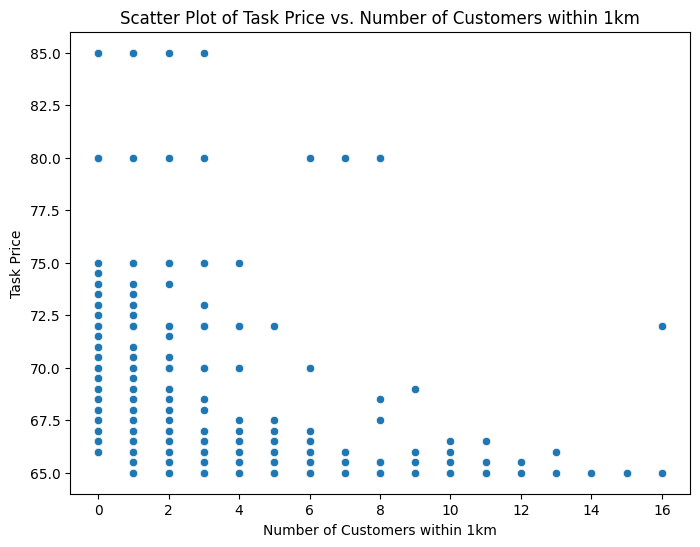

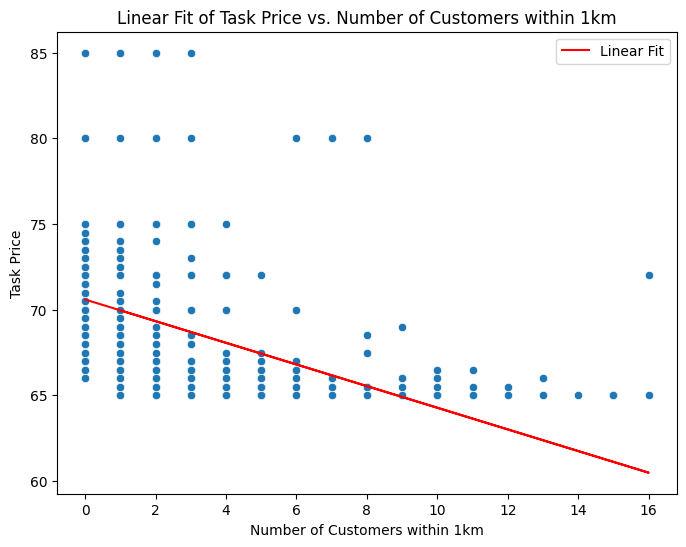

In [31]:
import seaborn as sns
import numpy as np
from scipy.stats import pearsonr
from sklearn.linear_model import LinearRegression

df = merged_df
# 绘制散点图
plt.figure(figsize=(8, 6))
sns.scatterplot(x='1km内顾客数量', y='任务标价', data=df)
plt.title('Scatter Plot of Task Price vs. Number of Customers within 1km')
plt.xlabel('Number of Customers within 1km')
plt.ylabel('Task Price')
# 保存图像为PNG格式
plt.savefig('scatter.png', dpi=300, bbox_inches='tight')

# 计算相关系数
corr, _ = pearsonr(df['1km内顾客数量'], df['任务标价'])
print(f'Pearson correlation coefficient: {corr}')

# 使用线性回归进行拟合
X = df['1km内顾客数量'].values.reshape(-1, 1)
y = df['任务标价'].values
reg = LinearRegression().fit(X, y)

# 绘制拟合曲线
plt.figure(figsize=(8, 6))
sns.scatterplot(x='1km内顾客数量', y='任务标价', data=df)
plt.plot(df['1km内顾客数量'], reg.predict(X), color='red', label='Linear Fit')
plt.title('Linear Fit of Task Price vs. Number of Customers within 1km')
plt.xlabel('Number of Customers within 1km')
plt.ylabel('Task Price')
plt.legend()
# plt.show()


# 打印拟合模型的系数和截距
print(f'Linear model slope: {reg.coef_[0]}, intercept: {reg.intercept_}')

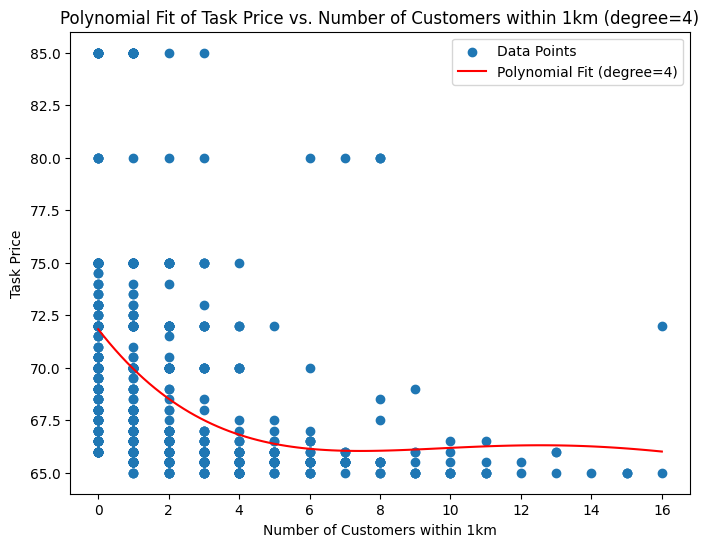

In [32]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

# 使用3次多项式进行拟合
degree = 4
polyreg = make_pipeline(PolynomialFeatures(degree), LinearRegression())

# 训练模型
X = df['1km内顾客数量'].values.reshape(-1, 1)
y = df['任务标价'].values
polyreg.fit(X, y)

# 预测
X_pred = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
y_pred = polyreg.predict(X_pred)

# 绘制拟合曲线
plt.figure(figsize=(8, 6))
plt.scatter(df['1km内顾客数量'], df['任务标价'], label='Data Points')
plt.plot(X_pred, y_pred, color='red', label=f'Polynomial Fit (degree={degree})')
plt.title(f'Polynomial Fit of Task Price vs. Number of Customers within 1km (degree={degree})')
plt.xlabel('Number of Customers within 1km')
plt.ylabel('Task Price')
plt.legend()
plt.show()


Fitted parameters: a = 6.257209393956896, b = -0.37270068491599273, c = 65.57211262654697


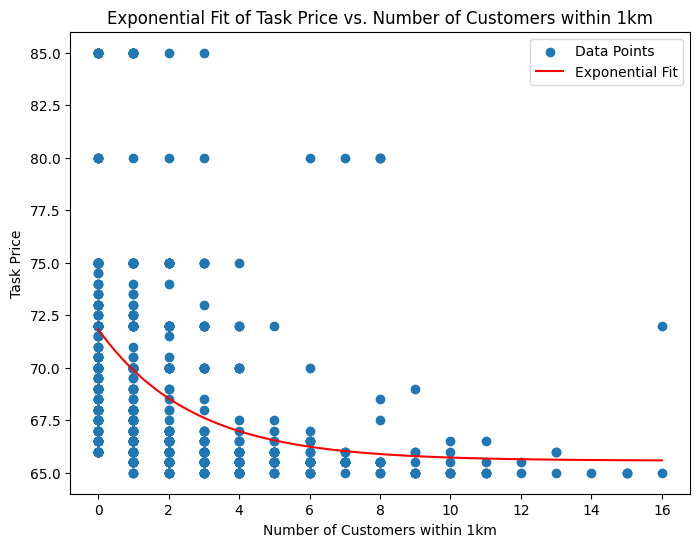

In [33]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# 定义指数函数
def exp_func(x, a, b, c):
    return a * np.exp(b * x) + c

# 准备数据
X = df['1km内顾客数量'].values
y = df['任务标价'].values

# 使用scipy的curve_fit拟合指数模型
popt, pcov = curve_fit(exp_func, X, y, p0=(1, -0.1, 70))

# 绘制数据点和拟合曲线
plt.figure(figsize=(8, 6))
plt.scatter(X, y, label='Data Points')
plt.plot(np.linspace(X.min(), X.max(), 100), exp_func(np.linspace(X.min(), X.max(), 100), *popt), color='red', label='Exponential Fit')
plt.title('Exponential Fit of Task Price vs. Number of Customers within 1km')
plt.xlabel('Number of Customers within 1km')
plt.ylabel('Task Price')
plt.legend()
# plt.show()
# 保存图像为PNG格式
plt.savefig('nihe.png', dpi=300, bbox_inches='tight')
# 打印拟合参数
print(f'Fitted parameters: a = {popt[0]}, b = {popt[1]}, c = {popt[2]}')


深圳具体分析

In [34]:
shenzhen_rows = merged_df.iloc[index2]
shenzhen_rows

,任务gps纬度,任务gps经度,任务标价,任务执行情况,1km内顾客数量
任务号码,,,,,
A0001,22.566142,113.980837,66.0,0,0
A0002,22.686205,113.940525,65.5,0,12
A0003,22.576512,113.957198,65.5,1,4
A0004,22.564841,114.244571,75.0,0,0
A0005,22.558888,113.950723,65.5,0,2
...,...,...,...,...,...
A0465,22.546603,114.104955,67.0,0,5
A0466,22.575176,114.144939,67.0,0,1
A0467,22.568478,113.900111,65.5,0,6


In [35]:
mean_value = shenzhen_rows[shenzhen_rows['任务执行情况'] == 1]['1km内顾客数量'].mean()
print(mean_value)

4.176470588235294


In [36]:
mean_value = shenzhen_rows[shenzhen_rows['任务执行情况'] == 0]['1km内顾客数量'].mean()
print(mean_value)

3.387596899224806


佛山具体分析

In [37]:
foshan_rows = merged_df.iloc[index3]
foshan_rows

,任务gps纬度,任务gps经度,任务标价,任务执行情况,1km内顾客数量
任务号码,,,,,
A0482,23.005696,113.124366,65.5,0,3
A0484,23.032726,113.120130,65.5,0,3
A0485,23.006211,113.124131,65.5,0,2
A0490,23.031223,113.120797,65.5,0,4
A0514,22.959983,113.047410,72.5,1,1
...,...,...,...,...,...
A0829,23.179030,112.876192,80.0,1,0
A0830,23.123411,113.151775,85.0,1,1
A0831,23.044062,113.125784,65.5,0,5


In [38]:
mean_value = foshan_rows[foshan_rows['任务执行情况'] == 1]['1km内顾客数量'].mean()
print(mean_value)

0.8869565217391304


In [39]:
mean_value = foshan_rows[foshan_rows['任务执行情况'] == 0]['1km内顾客数量'].mean()
print(mean_value)

1.9152542372881356


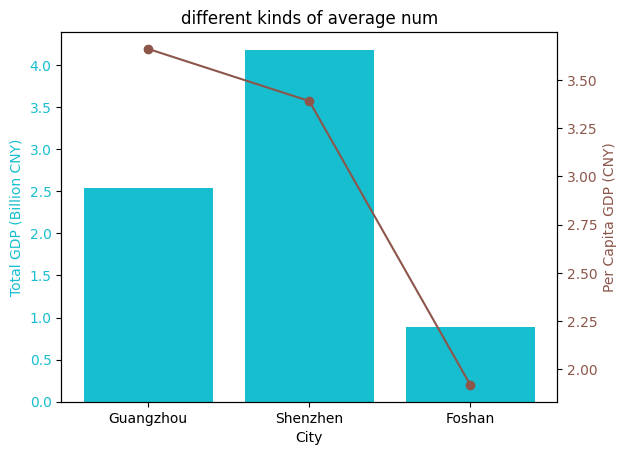

In [40]:
# 数据
cities = ["Guangzhou", "Shenzhen", "Foshan"]
avg_num1 = [2.54, 4.18, 0.89]  # 单位: 亿元
avg_num0 = [3.66, 3.39, 1.92]  # 单位: 元

# 创建图形
fig, ax1 = plt.subplots()

# 绘制总GDP的柱状图
color = 'tab:cyan'
ax1.set_xlabel('City')
ax1.set_ylabel('Total GDP (Billion CNY)', color=color)
ax1.bar(cities, avg_num1, color=color)
ax1.tick_params(axis='y', labelcolor=color)

# 创建第二个Y轴，共享X轴
ax2 = ax1.twinx()
color = 'tab:brown'
ax2.set_ylabel('Per Capita GDP (CNY)', color=color)
ax2.plot(cities, avg_num0, color=color, marker='o')
ax2.tick_params(axis='y', labelcolor=color)

# 标题和展示
plt.title('different kinds of average num')
plt.show()